# Introduction 
<br>
Pokémon is a global icon to children and adults everywhere. It is a TV series that has expanded into video games, card games, movies, merchandise and everything in between. The motivation behind this analysis is to further understand the dynamics of the Pokémon universe through data.
<br>
<br>
In this data three files available, the first one contains the Pokémon characteristics (the first column being the id of the Pokémon). The second one contains information about previous combats. The first two columns contain the ids of the combatants and the third one the id of the winner.
<br>
<br>

* In this kernel you will see some visualizations for a statistically better comprehension of pokemon data.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [18]:
# Importing data
data = pd.read_csv('F:/ML/github/Pokemon Data Analysis/pokemon.csv')
copied_data = data.copy()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [20]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

* As you see above, among all almost full columns,  only "Type 2" has 386 null objects. Therefore, we will have to deal with it later.

In [21]:
data.sample(10)Electric

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
244,245,Mantine,Water,Flying,65,40,70,80,140,70,2,False
346,347,Swalot,Poison,NaN,100,73,83,73,83,55,3,False
391,392,Chimecho,Psychic,NaN,65,50,70,95,80,65,3,False
731,732,Talonflame,Fire,Flying,78,81,71,74,69,126,6,False
625,626,Tirtouga,Water,Rock,54,78,103,53,45,22,5,False
682,683,Druddigon,Dragon,NaN,77,120,90,60,90,48,5,False
247,248,Houndoom,Dark,Fire,75,90,50,110,80,95,2,False
279,280,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False
628,629,Archeops,Rock,Flying,75,140,65,112,65,110,5,False
110,111,Exeggcute,Grass,Psychic,60,40,80,60,45,40,1,False


* Before checking the correlations between the features and making the data more interpretable with some plots, firstly let's drop the "#" column and instead of that column, **make the indices start from 1**.

In [22]:
# Droping "#" column
data.drop(["#"], axis=1, inplace = True)
#data.rename(columns={'#':'No'}, inplace=True)

In [23]:
data.sample(4)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
307,Surskit,Bug,Water,40,30,32,50,52,65,3,False
365,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
65,Poliwag,Water,NaN,40,50,40,40,40,90,1,False
335,Medicham,Fighting,Psychic,60,60,75,60,75,80,3,False


In [24]:
# Starting index from 1 & assigning an index name
data.index = range(1,801,1)
data.index.name = "New Index"       
data.head(10) # let's check it now.

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
New Index,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False


* With the heatmap of Seaborn visualization library, let's see the correlations among features.
* Since correlation is about quantitative values, you can only see correlations of numerical features.
* At first sight, it seems that features have non-linear relationships among each other. Therefore, I'd rather use **"spearman"** than** "pearson"** as a correlation coefficient since also that's a small dataset.

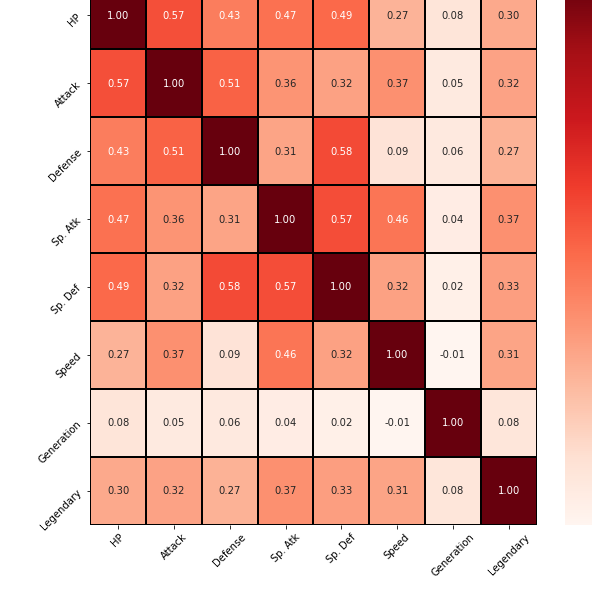

In [25]:
# Correlation map through heatmap
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr('spearman'),linewidths=1, linecolor='black', cmap='Reds', annot = True, fmt='.2f',ax=ax)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()              # you don't need to write this, but if you don't write, an information script will be show up and visually ruins your kernel.

Now let's see how "Defense" and "Speed" change with respect to "Attack"

In [26]:
trace1 =go.Scatter(
                    x = data.Attack,
                    y = data.Defense,
                    mode = "markers",
                    name = "Attack",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data['Type 1'])

trace2 =go.Scatter(
                    x = data.Attack,
                    y = data.Speed,
                    mode = "markers",
                    name = "Defense",
                    marker = dict(color = 'rgba(15, 200, 30, 0.4)'),
                    text= data['Type 1'])

data2 = [trace1, trace2]
layout = dict(title = 'Defense and Speed values with respect to Attack',
              xaxis= dict(title= 'Attack',ticklen= 5,zeroline= False), # ticklen : eksenlerdeki değerlerin ticklerinin uzunluğu
              yaxis= dict(title= 'Defense & Speed',ticklen= 5,zeroline= False)
             )
fig = dict(data = data2, layout = layout)
iplot(fig)

* It's time to see how many pokemons there are from each Type1 features with seaborn's barplot.

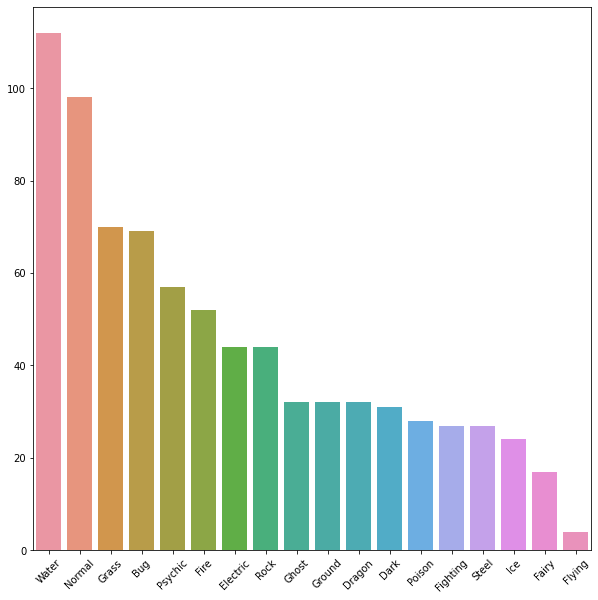

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x= data['Type 1'].value_counts().index, y= data['Type 1'].value_counts().values)
plt.xticks(rotation=45)
plt.show()

* If you don't have a ruler close by you, it's better to plot with Pyplot to see absolute numbers of pokemons.

In [28]:
bar = go.Bar(
                x= data['Type 1'].value_counts().index,
                y= data['Type 1'].value_counts().values,
                marker = dict(color = 'rgba(21, 180, 255, 0.7)',
                             line=dict(color='rgb(104,32,0)',width=1.5)),
                text = data['Type 1'].value_counts().index)
databar = [bar]
layout = dict(title = 'Value Counts of Type 1 Pokemons',
             xaxis =dict(title='Species' ),
              yaxis =dict(title='Counts' )
             )
fig = go.Figure(data = databar, layout = layout)
iplot(fig)

* Now let's drop NaN values of "Type 2" column.

**While dropping you have to specify the columns having nan values through "subset", otherwise it won't work so nan values won't have been dropped**

In [29]:
data_new = data.copy()
data_new.dropna(subset=['Type 2'], inplace = True)
data_new.index = range(1,415,1)
data_new.index.name = 'Dropped'
data_new.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Dropped,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charizard,Fire,Flying,78,84,78,109,85,100,1,False


* Plotting a pieplot which shows the percentage of legendary of any type.

**Pie charts are usually not preferred since they're less visually informative. **

In [30]:
fig = {
  "data": [
    {
      "values": data_new['Type 2'].value_counts().values,
      "labels": data_new['Type 2'].value_counts().index,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentages of Legendary Pokemons w.r.t. Types"
    }
}
iplot(fig)

* Using a "bubble plot" we can visualize multiple dimensions of our data. 
* Here, after sorting the attacks of first 50 greatest pokemons descending, size of the bubbles will represent the magnitude of defense and colors will correspond to magnitude of speed with respect to a colorscale. 

**If the indices of dataframes which will be concatenated don't pair off each other,  concatenated dataframe will not be sorted as you want, so watch out!**

In [32]:
data.sort_values('Attack',inplace=True,ascending=False)
datarank = data.copy()
datarank.index = range(0,800,1)

nums = copied_data['#'].iloc[:50]

sorted_data = pd.concat([datarank,nums], axis=1).iloc[:50]

In [33]:
sorted_data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,#
0,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,1.0
1,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,2.0
2,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,3.0
3,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True,4.0
4,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,5.0


In [34]:
data_bubble = [ dict(x=sorted_data['#'],
         y=sorted_data['Attack'],
         mode= 'markers',
         marker = dict(size = datarank.Defense/3, color = datarank.Speed, showscale = True),
                 
         text = sorted_data.Name)]
iplot(data_bubble)

Lastly, we're visualizing statistics of different types of pokemons via a rainbow violin plot from greatest to.

* **The biggest advantage of using Plotly in violin plots within boxes is to be able to observe both  estimates of location and distribution due to its interactive plotting features.**

In [35]:
data['Type 1'].nunique()
types = []
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 255, 18)]

for i in range(18):
    violins = {
            "type": 'violin',
            "y": data.Attack[data['Type 1'] == data['Type 1'].value_counts(ascending=False).index[i]],
            "name": data['Type 1'].value_counts(ascending=False).index[i],
            "marker":{
                "color":c[i]},
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    types.append(violins)
iplot(types)

*** BONUS** : A redneck plot

In [40]:
# Splitting Data
data_water = data[data['Type 1']=='Water']
data_grass = data[data['Type 1']=='Grass']
data_fire = data[data['Type 1']=='Fire']
data_bug = data[data['Type 1']=='Bug']
data_psychic = data[data['Type 1']=='Psychic']
data_Electric = data[data['Type 1']=='Electric']

box1 = go.Box(
                y= data_water.Attack,
                name= 'Water Pokemons',
                marker = dict(color = 'rgb(12, 128, 128)'),
                boxmean='sd',
                boxpoints='all')
box2 = go.Box(
                y= data_grass.Attack,
                name= 'Grass Pokemons',
                marker = dict(color = 'rgb(100, 12, 38)'),
                boxmean='sd',
                boxpoints='all')
box3 = go.Box(
                y= data_fire.Attack,
                name= 'Fire Pokemons',
                marker = dict(color = 'rgb(12, 128, 128)'),
                boxmean='sd',
                boxpoints='all')
box4 = go.Box(
                y= data_bug.Attack,
                name= 'Bug Pokemons',
                marker = dict(color = 'rgb(50, 40, 100)'),
                boxmean='sd',
                boxpoints='all')
box5 = go.Box(
                y= data_psychic.Attack,
                name= 'Psychic Pokemons',
                marker = dict(color = 'rgb(45, 179, 66)'),
                boxmean='sd',
                boxpoints='all')

box6 = go.Box(
                y= data_Electric.Attack,
                name= 'Electric Pokemons',
                marker = dict(color = 'rgb(215, 204, 48)'),
                boxmean='sd',
                boxpoints='all')

data_boxes = [box1,box2,box3,box4,box5,box6]
iplot(data_boxes)

* I'll be thankful if you upvote this kernel in case you like it, thanks in advance.


# **END**